In [1]:
def get_rows(cols,tot):
#     tot = 21
#     cols = 5 
    rows = int(np.ceil(tot/cols)) 
    print(rows*cols, 'tot', tot)
    return rows 

In [2]:
get_rows(5,21)

25 tot 21


5

In [3]:
tot = 21 
cols = 5 
rows = 22//5
print(rows)

4


In [4]:
tot = 21 
cols = 5 
rows = 24//5
print(rows)

4


In [5]:
np.ceil(3.4)

4.0

In [6]:
row = mega_list.iloc[1]

NameError: name 'mega_list' is not defined

In [7]:
row

NameError: name 'row' is not defined

In [8]:
ds = xr.open_dataset(row.path)
ds.Time

NameError: name 'row' is not defined

In [335]:
t1=5
b1=0
ds1 = ds.isel(Time=slice(t1,t1+2),bottom_top=slice(b1,b1+2))[['P','T','PB']].copy()
# ds1

In [336]:
save_path='/tmp/er'+str(t1)
try: os.remove(save_path)
except: pass
ds1.to_netcdf(save_path)

In [337]:
nds = wrf.getvar(netCDF4.Dataset(save_path),'tc',timeidx=0)[0]

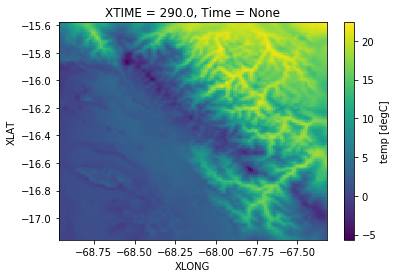

In [338]:
nds.plot(x='XLONG',y='XLAT',robust=True,vmin=nds.min(),vmax=nds.max())

In [478]:
d1 = mega_l['d01']
d2 = mega_l['d02']
d3 = mega_l['d03']
d4 = mega_l['d04']
dds = [d1,d2,d3,d4]
lds = [len(l) for l in dds]
lds

[433, 433, 433, 433]

In [479]:
def get_nds(row, t1=0):
    ds = xr.open_dataset(row.path)
    ds.Time
    b1=0
    ds1 = ds.isel(Time=slice(t1,t1+2),bottom_top=slice(b1,b1+2))[['P','T','PB']].copy()
    # ds1
    save_path='/tmp/wrf_tmp'+str(t1)+str(np.random.randint(1000000))
    
    try: os.remove(save_path)
    except: pass
    ds1.to_netcdf(save_path)
    nds = wrf.getvar(netCDF4.Dataset(save_path),'tc',timeidx=0)[0]
    return nds

In [465]:
ind = 10
row3 = mega_l['d03'].iloc[ind]
row4 = mega_l['d04'].iloc[ind]

In [464]:
nds3 = get_nds(row3)
nds4 = get_nds(row4)

In [466]:
def get_fun(fun):
    res = np.array([fun(i).values for i in [nds3, nds4]])
    return res

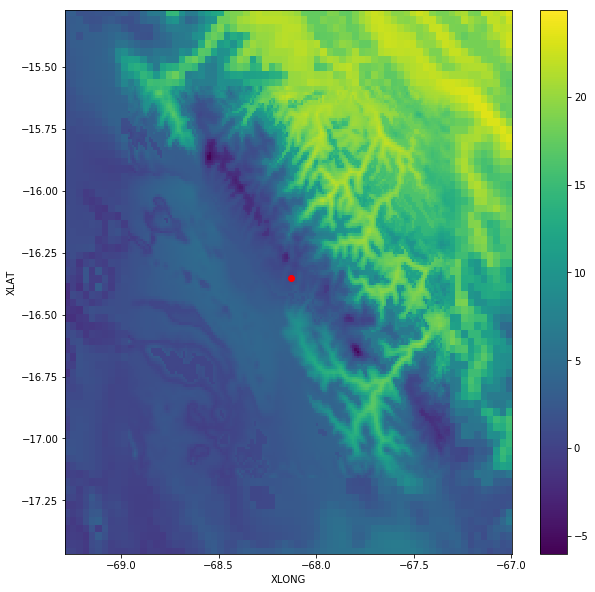

In [481]:
fig, ax = plt.subplots()
# nds3.plot.imshow()
vm=min(get_fun(xr.DataArray.min))
vM=max(get_fun(xr.DataArray.max))
m1 = nds3.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
nds4.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
fig.set_size_inches(10,10)
fig.colorbar(m1)

gb = wrf.geo_bounds(nds4)

gb.bottom_left.lat

lam = gb.bottom_left.lat
lom = gb.bottom_left.lon
laM = gb.top_right.lat
loM = gb.top_right.lon

lad = laM-lam
lod = loM-lom
par = .2
lap = lad * par 
lop = lod * par 

ax.set_ylim(lam-lap,laM+lap)
ax.set_xlim(lom-lop,loM+lop)
ax.set_title('')

ax.scatter(*ye.LOLA_CHC,c='r')

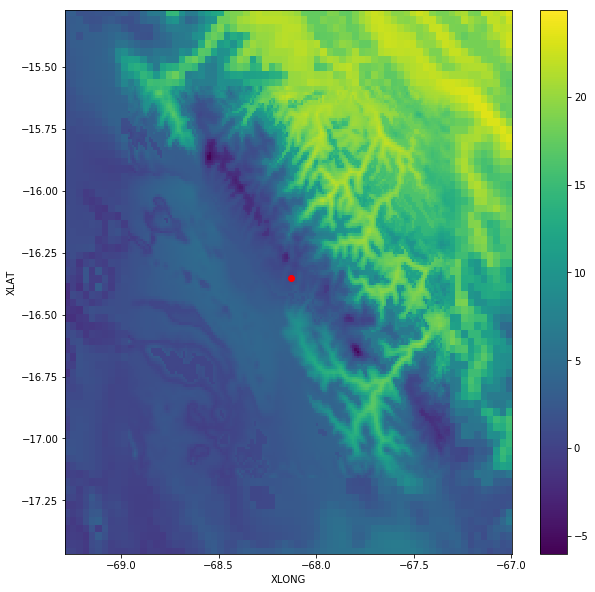

In [481]:
fig, ax = plt.subplots()
# nds3.plot.imshow()
vm=min(get_fun(xr.DataArray.min))
vM=max(get_fun(xr.DataArray.max))
m1 = nds3.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
nds4.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
fig.set_size_inches(10,10)
fig.colorbar(m1)

gb = wrf.geo_bounds(nds4)

gb.bottom_left.lat

lam = gb.bottom_left.lat
lom = gb.bottom_left.lon
laM = gb.top_right.lat
loM = gb.top_right.lon

lad = laM-lam
lod = loM-lom
par = .2
lap = lad * par 
lop = lod * par 

ax.set_ylim(lam-lap,laM+lap)
ax.set_xlim(lom-lop,loM+lop)
ax.set_title('')

ax.scatter(*ye.LOLA_CHC,c='r')

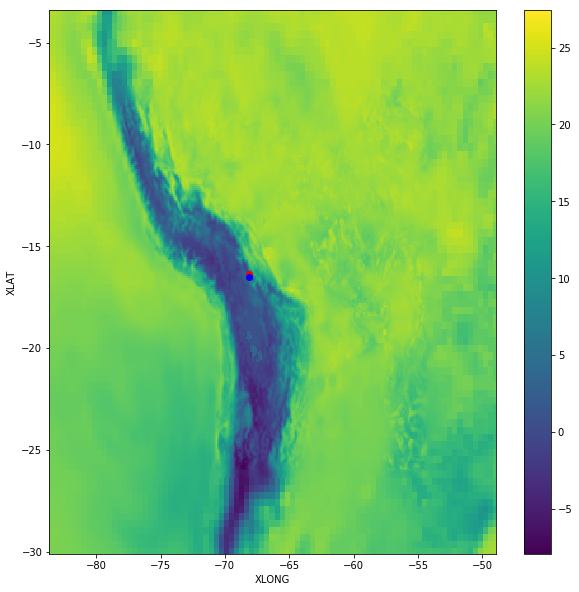

In [487]:
ind = 10
row3 = mega_l['d01'].iloc[ind]
row4 = mega_l['d02'].iloc[ind]

nds3 = get_nds(row3)
nds4 = get_nds(row4)

def get_fun(fun):
    res = np.array([fun(i).values for i in [nds3, nds4]])
    return res

fig, ax = plt.subplots()
# nds3.plot.imshow()
vm=min(get_fun(xr.DataArray.min))
vM=max(get_fun(xr.DataArray.max))
m1 = nds3.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
nds4.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
fig.set_size_inches(10,10)
fig.colorbar(m1)

gb = wrf.geo_bounds(nds4)

gb.bottom_left.lat

lam = gb.bottom_left.lat
lom = gb.bottom_left.lon
laM = gb.top_right.lat
loM = gb.top_right.lon

lad = laM-lam
lod = loM-lom
par = .2
lap = lad * par 
lop = lod * par 

ax.set_ylim(lam-lap,laM+lap)
ax.set_xlim(lom-lop,loM+lop)
ax.set_title('')

ax.scatter(*ye.LOLA_CHC,c='r')
ax.scatter(*ye.LOLA_LPZ,c='b')

In [465]:
ind = 10
row3 = mega_l['d03'].iloc[ind]
row4 = mega_l['d04'].iloc[ind]

In [464]:
nds3 = get_nds(row3)
nds4 = get_nds(row4)

In [466]:
def get_fun(fun):
    res = np.array([fun(i).values for i in [nds3, nds4]])
    return res

In [473]:
fig.savefig('/tmp/fig.pdf')